In [66]:
# -*- coding: utf-8 -*-

import os
os.chdir('/home/zl/develop/projects/hbc')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, feature_extraction
import time
import datetime
%matplotlib inline

In [84]:
### define some query functions
def getTimespanWithHolidays(yday, yday_holi_list):
    if len(yday_holi_list) <= 0:
        return 100
    timespan2holi_min = 1000
    for i in range(len(yday_holi_list)):
        timespan2holi_tmp = np.abs(yday_holi_list[i] - yday)
        if timespan2holi_tmp < timespan2holi_min:
            timespan2holi_min = timespan2holi_tmp
    return timespan2holi_min

def getTimeFromTimestamp(timestamp):
    time_local = time.localtime(timestamp)
    tm_year = time_local.tm_year
    tm_mon = time_local.tm_mon
    tm_day = time_local.tm_mday
    tm_hour = time_local.tm_hour
    tm_min = time_local.tm_min
    tm_sec = time_local.tm_sec
    tm_wday = time_local.tm_wday
    tm_yday = time_local.tm_yday
    return tm_year, tm_mon, tm_day, tm_hour, tm_min, tm_sec, tm_wday, tm_yday

def str2vec(commkeywords):
    commkeywords = commkeywords[1:-1]
    commkeywords = commkeywords.split(',')
    commkeywords[0]
    str.strip(commkeywords[0], '\'')
    commkeywords = [str.strip(s, '\'') for s in commkeywords]
    return commkeywords

def list_to_dict(lst):
    dic = {}
    for i in lst:
        dic[i] = lst.count(i)
    dic = sorted(dic.items(), key=lambda item:item[1], reverse = True)
    return dic

## 1 载入数据

In [3]:
### load data
train_or_test = 'train'
#train_or_test = 'test'
df_profile = pd.read_csv('./data_train_test/userProfile_'+train_or_test+'.csv')
df_ordhistory = pd.read_csv('./data_train_test/orderHistory_'+train_or_test+'.csv')
df_action = pd.read_csv('./data_train_test/action_'+train_or_test+'.csv')
df_comm = pd.read_csv('./data_train_test/userComment_'+train_or_test+'.csv')
df_ordfuture = pd.read_csv('./data_train_test/orderFuture_'+train_or_test+'.csv')
usercount = len(df_profile)
df = pd.DataFrame(df_profile['userid'])
df['futureOrderType'] = df_ordfuture['orderType']

## 2 分析action数据

In [296]:
df_action.head(5)

,userid,actionType,actionTime
0,100000000013,1,1474300753
1,100000000013,5,1474300763
2,100000000013,6,1474300874
3,100000000013,5,1474300911
4,100000000013,6,1474300936


In [297]:
actiontime_min = np.min(df_action['actionTime'])
actiontime_max = np.max(df_action['actionTime'])
print('time_min:', getTimeFromTimestamp(actiontime_min))
print('time_max:', getTimeFromTimestamp(actiontime_max))

time_min: (2016, 8, 14, 4, 10, 58, 6, 227)
time_max: (2017, 9, 11, 7, 57, 45, 0, 254)


In [298]:
df_action_type9 = df_action[df_action['actionType'] == 9]
print(len(df_action_type9))
df_action_type9.head(5)

18387


,userid,actionType,actionTime
7,100000000013,9,1474300990
9,100000000013,9,1474302194
121,100000000013,9,1501959658
292,100000000393,9,1499440311
320,100000000423,9,1481660372


In [299]:
#检查数据完整性
df_action_type9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18387 entries, 7 to 1334764
Data columns (total 3 columns):
userid        18387 non-null int64
actionType    18387 non-null int64
actionTime    18387 non-null int64
dtypes: int64(3)
memory usage: 574.6 KB


In [300]:
tm_year_list = np.zeros(len(df_action_type9))
tm_mon_list = np.zeros(len(df_action_type9))
tm_day_list = np.zeros(len(df_action_type9))
tm_hour_list = np.zeros(len(df_action_type9))
tm_min_list = np.zeros(len(df_action_type9))
tm_sec_list = np.zeros(len(df_action_type9))
tm_wday_list = np.zeros(len(df_action_type9))
tm_yday_list = np.zeros(len(df_action_type9))
for i in range(len(df_action_type9)):
    actiontime = df_action_type9.iloc[i]['actionTime']
    tm_year, tm_mon, tm_day, tm_hour, tm_min, tm_sec, tm_wday, tm_yday = getTimeFromTimestamp(actiontime)
    tm_year_list[i] = tm_year
    tm_mon_list[i] = tm_mon
    tm_day_list[i] = tm_day
    tm_hour_list[i] = tm_hour
    tm_min_list[i] = tm_min
    tm_sec_list[i] = tm_sec
    tm_wday_list[i] = tm_wday
    tm_yday_list[i] = tm_yday
df_action_type9['tm_year'] = tm_year_list
df_action_type9['tm_mon'] = tm_mon_list
df_action_type9['tm_day'] = tm_day_list
df_action_type9['tm_hour'] = tm_hour_list
df_action_type9['tm_min'] = tm_min_list
df_action_type9['tm_sec'] = tm_sec_list
df_action_type9['tm_wday'] = tm_wday_list
df_action_type9['tm_yday'] = tm_yday_list

D:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\d

In [301]:
df_action_type9.head(20)

,userid,actionType,actionTime,tm_year,tm_mon,tm_day,tm_hour,tm_min,tm_sec,tm_wday,tm_yday
7,100000000013,9,1474300990,2016.0,9.0,20.0,0.0,3.0,10.0,1.0,264.0
9,100000000013,9,1474302194,2016.0,9.0,20.0,0.0,23.0,14.0,1.0,264.0
121,100000000013,9,1501959658,2017.0,8.0,6.0,3.0,0.0,58.0,6.0,218.0
292,100000000393,9,1499440311,2017.0,7.0,7.0,23.0,11.0,51.0,4.0,188.0
320,100000000423,9,1481660372,2016.0,12.0,14.0,4.0,19.0,32.0,2.0,349.0
322,100000000423,9,1481661480,2016.0,12.0,14.0,4.0,38.0,0.0,2.0,349.0
451,100000000423,9,1501673653,2017.0,8.0,2.0,19.0,34.0,13.0,2.0,214.0
453,100000000423,9,1501673660,2017.0,8.0,2.0,19.0,34.0,20.0,2.0,214.0
457,100000000423,9,1501688814,2017.0,8.0,2.0,23.0,46.0,54.0,2.0,214.0
524,100000000423,9,1502109248,2017.0,8.0,7.0,20.0,34.0,8.0,0.0,219.0


(array([  194.,    89.,   365.,  2031.,  3938.,  3114.,  2330.,  1367.,
         1214.,  3248.,   319.,   178.]),
 array([  1.        ,   1.91666667,   2.83333333,   3.75      ,
          4.66666667,   5.58333333,   6.5       ,   7.41666667,
          8.33333333,   9.25      ,  10.16666667,  11.08333333,  12.        ]),
 <a list of 12 Patch objects>)

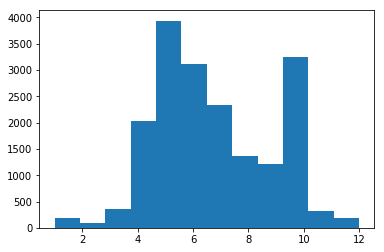

In [302]:
plt.hist(df_action_type9['tm_mon'], bins=12)

(array([ 1176.,  1072.,   935.,   925.,  1028.,  1093.,   981.,   862.,
          558.,   291.,   207.,   132.,   111.,   125.,   214.,   375.,
          537.,   872.,  1287.,  1189.,  1049.,  1000.,  1186.,  1182.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

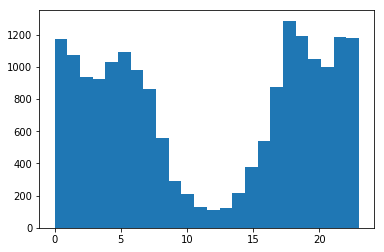

In [303]:
plt.hist(df_action_type9['tm_hour'], bins=24)

(array([ 2520.,  2879.,  2754.,  2645.,  2924.,  2473.,  2192.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

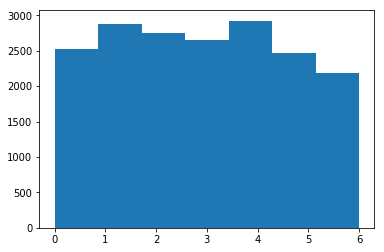

In [304]:
plt.hist(df_action_type9['tm_wday'], bins=7)

(array([ 113.,   19.,   33.,   28.,   24.,   15.,   29.,   22.,   26.,
          34.,   45.,  206.,  161.,  208.,  628.,  765.,  910.,  948.,
         921.,  921.,  933.,  725.,  761.,  732.,  669.,  918.,  527.,
         366.,  374.,  332.,  359.,  305.,  307.,  274.,   91.,   16.,
         618.,  683.,  814.,  706.,  980.,  406.,  136.,   59.,   38.,
          42.,   35.,   51.,   39.,   35.]),
 array([   1. ,    8.3,   15.6,   22.9,   30.2,   37.5,   44.8,   52.1,
          59.4,   66.7,   74. ,   81.3,   88.6,   95.9,  103.2,  110.5,
         117.8,  125.1,  132.4,  139.7,  147. ,  154.3,  161.6,  168.9,
         176.2,  183.5,  190.8,  198.1,  205.4,  212.7,  220. ,  227.3,
         234.6,  241.9,  249.2,  256.5,  263.8,  271.1,  278.4,  285.7,
         293. ,  300.3,  307.6,  314.9,  322.2,  329.5,  336.8,  344.1,
         351.4,  358.7,  366. ]),
 <a list of 50 Patch objects>)

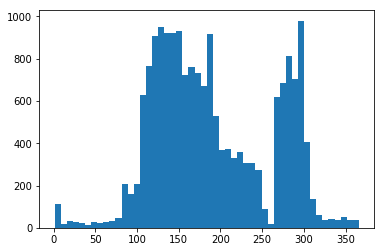

In [305]:
plt.hist(df_action_type9['tm_yday'], bins=50)

In [306]:
#获取任意一个日期在一年中是第几天
timestamp = int(time.mktime(time.strptime("2017-7-01 0:0:0", "%Y-%m-%d %H:%M:%S")))
time.localtime(timestamp).tm_yday

182

In [327]:
yday_holi_list = [1, 121, 182]
timespan2holi_list = np.zeros(len(df_action_type9))
for i in range(len(df_action_type9)):
    yday = df_action_type9['tm_yday'].iloc[i]
    timespan2holi = getTimespanWithHolidays(yday, yday_holi_list)
    timespan2holi_list[i] = timespan2holi
df_action_type9['timespan2holi'] = timespan2holi_list
df_action_type9.head(5)

D:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,userid,actionType,actionTime,tm_year,tm_mon,tm_day,tm_hour,tm_min,tm_sec,tm_wday,tm_yday,timespan2holi
7,100000000013,9,1474300990,2016.0,9.0,20.0,0.0,3.0,10.0,1.0,264.0,82.0
9,100000000013,9,1474302194,2016.0,9.0,20.0,0.0,23.0,14.0,1.0,264.0,82.0
121,100000000013,9,1501959658,2017.0,8.0,6.0,3.0,0.0,58.0,6.0,218.0,36.0
292,100000000393,9,1499440311,2017.0,7.0,7.0,23.0,11.0,51.0,4.0,188.0,6.0
320,100000000423,9,1481660372,2016.0,12.0,14.0,4.0,19.0,32.0,2.0,349.0,167.0


(array([ 7870.,  4272.,  1014.,   573.,   823.,  2014.,  1481.,   138.,
          101.,   101.]),
 array([   0. ,   18.4,   36.8,   55.2,   73.6,   92. ,  110.4,  128.8,
         147.2,  165.6,  184. ]),
 <a list of 10 Patch objects>)

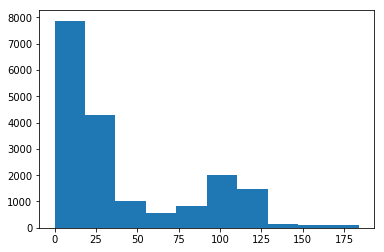

In [328]:
plt.hist(df_action_type9['timespan2holi'])

## 2 分析历史订单数据

In [332]:
print(df_ordhistory.shape)
df_ordhistory.head()

(20653, 7)


,userid,orderid,orderTime,orderType,city,country,continent
0,100000000013,1000015,1481714516,0,柏林,德国,欧洲
1,100000000013,1000014,1501959643,0,旧金山,美国,北美洲
2,100000000393,1000033,1499440296,0,巴黎,法国,欧洲
3,100000000459,1000036,1480601668,0,纽约,美国,北美洲
4,100000000459,1000034,1479146723,0,巴厘岛,印度尼西亚,亚洲


In [333]:
print(getTimeFromTimestamp(np.min(df_ordhistory['orderTime'])))
print(getTimeFromTimestamp(np.max(df_ordhistory['orderTime'])))

(2016, 11, 6, 0, 37, 53, 6, 311)
(2017, 9, 11, 21, 35, 53, 0, 254)


In [284]:
df_ordhist_type1 = df_ordhistory[df_ordhistory['orderType'] == 0]
print(df_ordhist_type1.shape)
df_ordhist_type1.head()

(4327, 7)


,userid,orderid,orderTime,orderType,city,country,continent
0,100000000371,1000029,1503443585,0,东京,日本,亚洲
1,100000001445,1000089,1478532275,0,新加坡,新加坡,亚洲
2,100000001445,1000085,1491296016,0,西雅图,美国,北美洲
3,100000001445,1000083,1478514442,0,新加坡,新加坡,亚洲
4,100000001445,1000086,1478545148,0,新加坡,新加坡,亚洲


In [285]:
yday_holi_list = [1, 40, 121, 182]
tm_year_list = np.zeros(len(df_ordhist_type1))
tm_mon_list = np.zeros(len(df_ordhist_type1))
tm_day_list = np.zeros(len(df_ordhist_type1))
tm_hour_list = np.zeros(len(df_ordhist_type1))
tm_min_list = np.zeros(len(df_ordhist_type1))
tm_sec_list = np.zeros(len(df_ordhist_type1))
tm_wday_list = np.zeros(len(df_ordhist_type1))
tm_yday_list = np.zeros(len(df_ordhist_type1))
timespan2holi_list = np.zeros(len(df_ordhist_type1))
for i in range(len(df_ordhist_type1)):
    histord_time = df_ordhist_type1.iloc[i]['orderTime']
    tm_year, tm_mon, tm_day, tm_hour, tm_min, tm_sec, tm_wday, tm_yday = getTimeFromTimestamp(histord_time)
    tm_year_list[i] = tm_year
    tm_mon_list[i] = tm_mon
    tm_day_list[i] = tm_day
    tm_hour_list[i] = tm_hour
    tm_min_list[i] = tm_min
    tm_sec_list[i] = tm_sec
    tm_wday_list[i] = tm_wday
    tm_yday_list[i] = tm_yday
    timespan2holi_list[i] = getTimespanWithHolidays(tm_yday, yday_holi_list)
df_ordhist_type1['ord1_tm_year'] = tm_year_list
df_ordhist_type1['ord1_tm_mon'] = tm_mon_list
df_ordhist_type1['ord1_tm_day'] = tm_day_list
df_ordhist_type1['ord1_tm_hour'] = tm_hour_list
df_ordhist_type1['ord1_tm_min'] = tm_min_list
df_ordhist_type1['ord1_tm_sec'] = tm_sec_list
df_ordhist_type1['ord1_tm_wday'] = tm_wday_list
df_ordhist_type1['ord1_tm_yday'] = tm_yday_list
df_ordhist_type1['ord1_timespan2holiday'] = timespan2holi_list

D:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\d

In [286]:
df_ordhist_type1.head(10)

,userid,orderid,orderTime,orderType,city,country,continent,ord1_tm_year,ord1_tm_mon,ord1_tm_day,ord1_tm_hour,ord1_tm_min,ord1_tm_sec,ord1_tm_wday,ord1_tm_yday,ord1_timespan2holiday
0,100000000371,1000029,1503443585,0,东京,日本,亚洲,2017.0,8.0,23.0,7.0,13.0,5.0,2.0,235.0,53.0
1,100000001445,1000089,1478532275,0,新加坡,新加坡,亚洲,2016.0,11.0,7.0,23.0,24.0,35.0,0.0,312.0,130.0
2,100000001445,1000085,1491296016,0,西雅图,美国,北美洲,2017.0,4.0,4.0,16.0,53.0,36.0,1.0,94.0,27.0
3,100000001445,1000083,1478514442,0,新加坡,新加坡,亚洲,2016.0,11.0,7.0,18.0,27.0,22.0,0.0,312.0,130.0
4,100000001445,1000086,1478545148,0,新加坡,新加坡,亚洲,2016.0,11.0,8.0,2.0,59.0,8.0,1.0,313.0,131.0
5,100000001445,1000082,1478514156,0,新加坡,新加坡,亚洲,2016.0,11.0,7.0,18.0,22.0,36.0,0.0,312.0,130.0
6,100000001575,1000107,1489586814,0,迪拜,阿联酋,亚洲,2017.0,3.0,15.0,22.0,6.0,54.0,2.0,74.0,34.0
7,100000001575,1000106,1489586686,0,迪拜,阿联酋,亚洲,2017.0,3.0,15.0,22.0,4.0,46.0,2.0,74.0,34.0
9,100000001737,1000128,1494761547,0,布里斯班,澳大利亚,大洋洲,2017.0,5.0,14.0,19.0,32.0,27.0,6.0,134.0,13.0
11,100000001737,1000116,1494783626,0,悉尼,澳大利亚,大洋洲,2017.0,5.0,15.0,1.0,40.0,26.0,0.0,135.0,14.0


(array([ 256.,  171.,  288.,  663.,  892.,  647.,  552.,  304.,   87.,
           0.,  214.,  253.]),
 array([  1.        ,   1.91666667,   2.83333333,   3.75      ,
          4.66666667,   5.58333333,   6.5       ,   7.41666667,
          8.33333333,   9.25      ,  10.16666667,  11.08333333,  12.        ]),
 <a list of 12 Patch objects>)

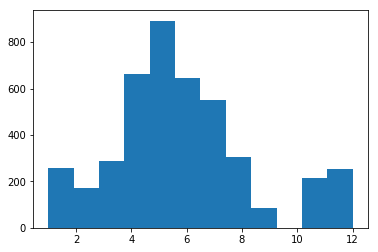

In [287]:
plt.hist(df_ordhist_type1['ord1_tm_mon'], bins=12)

(array([ 278.,  223.,  190.,  200.,  246.,  271.,  274.,  170.,  127.,
          76.,   42.,   35.,   30.,   38.,   62.,   81.,  136.,  209.,
         318.,  293.,  248.,  218.,  261.,  301.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

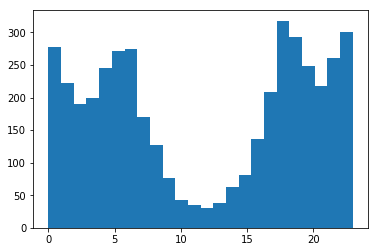

In [288]:
plt.hist(df_ordhist_type1['ord1_tm_hour'], bins=24)

(array([ 645.,  672.,  629.,  590.,  696.,  585.,  510.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

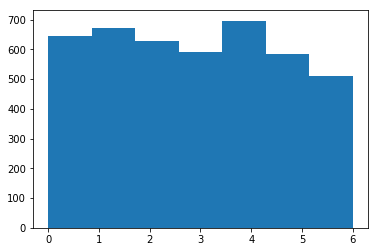

In [289]:
plt.hist(df_ordhist_type1['ord1_tm_wday'], bins=7)

(array([  92.,   66.,   41.,   49.,   33.,   54.,   49.,   43.,   60.,
          42.,   58.,   80.,  135.,  168.,  159.,  184.,  216.,  192.,
         217.,  195.,  211.,  169.,  140.,  171.,  140.,  222.,  123.,
          76.,   84.,   55.,   76.,   82.,   69.,   67.,   42.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   40.,  100.,   41.,
          38.,   64.,   54.,   54.,   76.]),
 array([   1. ,    8.3,   15.6,   22.9,   30.2,   37.5,   44.8,   52.1,
          59.4,   66.7,   74. ,   81.3,   88.6,   95.9,  103.2,  110.5,
         117.8,  125.1,  132.4,  139.7,  147. ,  154.3,  161.6,  168.9,
         176.2,  183.5,  190.8,  198.1,  205.4,  212.7,  220. ,  227.3,
         234.6,  241.9,  249.2,  256.5,  263.8,  271.1,  278.4,  285.7,
         293. ,  300.3,  307.6,  314.9,  322.2,  329.5,  336.8,  344.1,
         351.4,  358.7,  366. ]),
 <a list of 50 Patch objects>)

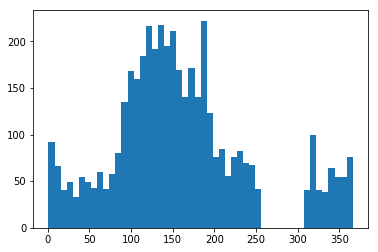

In [291]:
plt.hist(df_ordhist_type1['ord1_tm_yday'], bins=50)

(array([ 975.,  890.,  684.,  721.,  230.,  100.,   97.,   76.,   54.,
          33.,    0.,    0.,    0.,    0.,    0.,    0.,   20.,   93.,
          60.,   41.,   51.,   65.,   61.,   76.]),
 array([   0.        ,    7.66666667,   15.33333333,   23.        ,
          30.66666667,   38.33333333,   46.        ,   53.66666667,
          61.33333333,   69.        ,   76.66666667,   84.33333333,
          92.        ,   99.66666667,  107.33333333,  115.        ,
         122.66666667,  130.33333333,  138.        ,  145.66666667,
         153.33333333,  161.        ,  168.66666667,  176.33333333,  184.        ]),
 <a list of 24 Patch objects>)

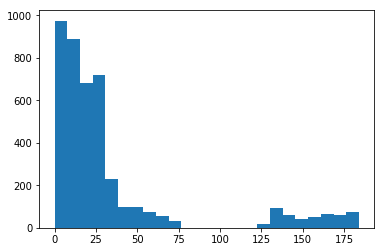

In [292]:
plt.hist(df_ordhist_type1['ord1_timespan2holiday'], bins=24)

In [92]:
dic1 = list_to_dict(df_ordhistory.loc[df_ordhistory['orderType']==1, 'city'].tolist())
dic2 = list_to_dict(df_ordhistory.loc[df_ordhistory['orderType']==0, 'city'].tolist())

[('新加坡', 1880),
 ('东京', 1550),
 ('纽约', 1024),
 ('香港', 995),
 ('台北', 972),
 ('吉隆坡', 970),
 ('悉尼', 932),
 ('大阪', 799),
 ('墨尔本', 702),
 ('曼谷', 691),
 ('巴黎', 570),
 ('伦敦', 567),
 ('洛杉矶', 515),
 ('普吉岛', 358),
 ('巴厘岛', 326),
 ('首尔', 296),
 ('旧金山', 240),
 ('清迈', 233),
 ('布里斯班', 187),
 ('温哥华', 165),
 ('黄金海岸', 162),
 ('波士顿', 160),
 ('沙巴--亚庇', 144),
 ('北海道--札幌', 138),
 ('奥克兰', 136),
 ('罗马', 125),
 ('华盛顿', 123),
 ('槟城', 121),
 ('多伦多', 109),
 ('拉斯维加斯', 109),
 ('凯恩斯', 105),
 ('巴塞罗那', 99),
 ('米兰', 98),
 ('京都', 87),
 ('苏梅岛', 87),
 ('芝加哥', 80),
 ('夏威夷欧胡岛（檀香山）', 74),
 ('西雅图', 72),
 ('奥兰多', 66),
 ('迪拜', 65),
 ('高雄', 52),
 ('马德里', 51),
 ('兰卡威', 48),
 ('济州岛', 46),
 ('名古屋', 46),
 ('台中', 45),
 ('胡志明市', 44),
 ('芽庄', 41),
 ('阿姆斯特丹', 35),
 ('雅典', 33),
 ('蒙特利尔', 31),
 ('尼斯', 31),
 ('费城', 29),
 ('阿德莱德', 26),
 ('珀斯', 25),
 ('暹粒', 25),
 ('莫斯科', 25),
 ('冲绳--那霸', 25),
 ('岘港', 23),
 ('新山', 23),
 ('迈阿密', 22),
 ('楠迪', 21),
 ('法兰克福', 20),
 ('卡尔加里', 19),
 ('甲米', 18),
 ('爱丁堡', 18),
 ('布拉格', 18),
 ('柏林', 17),
 ('澳门', 17),


In [96]:
X_factor = df_ordhistory.loc[df_ordhistory['orderType']==1, 'country']
enc = preprocessing.OneHotEncoder()
enc.fit(X_factor)
X_factors_transformed = enc.transform(X_factors).toarray()

ValueError: could not convert string to float: '日本'

## 3 分析评论数据comment

In [65]:
df_comm.head(20)

,userid,orderid,rating,tags,commentsKeyWords
0,100000000013,1000015,4.0,NaN,"['很','简陋','太','随便']"
1,100000000231,1000024,5.0,提前联系|耐心等候,"['很','细心']"
2,100000000471,1000038,5.0,NaN,NaN
3,100000000637,1000040,5.0,主动热情|提前联系|举牌迎接|主动搬运行李,NaN
4,100000000755,1000045,1.0,未举牌服务,NaN
5,100000000949,1000050,5.0,NaN,NaN
6,100000001023,1000065,5.0,主动热情|驾驶平稳|普通话流利|仪表整洁|车辆物资齐全|提前联系|行程安排有惊喜|景点介绍详...,"['真心','好','惊喜','惊喜','合理','还','真心','赞']"
7,100000001231,1000075,5.0,NaN,NaN
8,100000001505,1000094,5.0,主动热情|驾驶平稳|普通话流利|仪表整洁|车辆物资齐全|提前联系|行程安排有惊喜|景点介绍详...,"['非常','满意','认真','负责','诚恳','合理','很','精致','希望']"
9,100000001557,1000100,4.0,主动热情|文明礼貌|驾驶平稳|普通话流利|仪表整洁|干净整洁|车辆物资齐全|提前联系|主动搬...,NaN


In [60]:
def str2vec(commkeywords):
    commkeywords = commkeywords[1:-1]
    commkeywords = commkeywords.split(',')
    commkeywords[0]
    str.strip(commkeywords[0], '\'')
    commkeywords = [str.strip(s, '\'') for s in commkeywords]
    return commkeywords

def list_to_dict(lst):
    dic = {}
    for i in lst:
        dic[i] = lst.count(i)
    dic = sorted(dic.items(), key=lambda item:item[1], reverse = True)
    return dic

In [37]:
str(df_comm['commentsKeyWords'].iloc[2]) == 'nan'

True

In [ ]:
commkeywordslist = []
for i in range(len(df_comm['commentsKeyWords'])):
    commkeywords = str(df_comm['commentsKeyWords'].iloc[i])
    if str(commkeywords) == 'nan':
        continue
    if len(commkeywords) > 5:
        commkeywordslist.append(str2vec(commkeywords))
commkeywordslist

In [79]:
commkeywordslist = []
for i in range(len(df_comm['commentsKeyWords'])):
    commkeywords = str(df_comm['commentsKeyWords'].iloc[i])
    if str(commkeywords) == 'nan':
        continue
    if len(commkeywords) > 5:
        wordlist = str2vec(commkeywords)
        commkeywordslist.append(','.join(wordlist))
commkeywordslist

['很,简陋,太,随便',
 '很,细心',
 '真心,好,惊喜,惊喜,合理,还,真心,赞',
 '非常,满意,认真,负责,诚恳,合理,很,精致,希望',
 'very,good',
 '很,负责,辛苦,还',
 '非常,好,还,好,还,很,热情,美丽,肯定',
 '非常,满意',
 '很,凶,喜欢,喜欢,凶巴巴',
 '很,好,稳重',
 '非常,好',
 '非常,负责,还',
 '感谢,好,好,中',
 '非常,棒',
 '希望,很,好,谢谢',
 '非常,非常',
 '非常,负责,谢谢',
 '很,很,顺利,超级,好',
 '很,很,舒服',
 '绝对,很,好,还,很,关照,满足,名副其实',
 '长,很,热情,厚道,很,舒适,会,小,会,会',
 '还,不错,可能,熟悉,上,担心,关键,不错',
 '谢谢',
 '非常,好,很,顺利,祝,顺利,健康,快乐',
 '非常,好,还,热情',
 '非常,满意,完美',
 '主动,还,热情,还,好吃,好玩,陌生',
 '满意',
 '非常,不错,主动,热情',
 '挺,好',
 'good',
 '按时,欢乐',
 '非常,好,非常,还,定,一定',
 '非常,负责,非常热心',
 '非常,好,热情',
 '非常,准时,热情,娴熟,熟悉,特别,满意',
 '非常,好,谢谢',
 '准时,还,开心',
 '很,平稳,很,干净,很,新,很,好,热情,好',
 '非常,好,还,主动',
 '非常,好',
 '非常,好,着想',
 '非常,准时,干净,整洁,非常',
 '非常,好,会',
 '非常,好,亲切',
 '很,好,很,好,非常,不错',
 '超级,好,讲,经济,好',
 '非常,棒,非常,好,热情',
 '主动,干净,整洁,不错',
 '非常,棒,很,热情',
 '非常,非常,好,很,好,热情,很,开心,说,祝',
 '很,热情,很',
 '非常,好,特别,特别,非常,赞',
 '热情,细致,很,详细,还,注意',
 '非常,好',
 '标准,娴熟',
 '非常,满意',
 '很,好,很,好,很,好,很,好',
 '很,不错,稳定,还,很,好,还,很,还,怕,很,一定',
 '很,不错,辛苦',
 '很,很,好',
 '特别,热心',
 '热心,很,顺利',
 '很,满意,聊,开心',
 '非常,热情,友好,相当,

In [61]:
comm_dic = list_to_dict(commkeywordslist)
comm_dic

[('很', 2882),
 ('非常', 2013),
 ('好', 1867),
 ('热情', 947),
 ('还', 711),
 ('满意', 593),
 ('主动', 409),
 ('不错', 330),
 ('特别', 291),
 ('感谢', 262),
 ('准时', 238),
 ('谢谢', 226),
 ('赞', 196),
 ('棒', 194),
 ('超级', 192),
 ('会', 170),
 ('干净', 162),
 ('热心', 149),
 ('说', 147),
 ('周到', 143),
 ('愉快', 113),
 ('nice', 112),
 ('顺利', 109),
 ('平稳', 106),
 ('熟悉', 102),
 ('安全', 101),
 ('希望', 100),
 ('开心', 98),
 ('上', 95),
 ('细心', 94),
 ('一定', 88),
 ('太', 85),
 ('礼貌', 81),
 ('小', 80),
 ('亲切', 75),
 ('十分', 74),
 ('负责', 71),
 ('整洁', 71),
 ('下', 70),
 ('好吃', 69),
 ('聊', 68),
 ('舒适', 67),
 ('舒服', 65),
 ('挺', 65),
 ('稳', 65),
 ('辛苦', 59),
 ('方便', 59),
 ('详细', 57),
 ('需要', 56),
 ('大', 54),
 ('玩', 52),
 ('新', 48),
 ('最', 45),
 ('中', 44),
 ('细致', 44),
 ('喜欢', 43),
 ('非常热心', 43),
 ('讲', 42),
 ('定', 39),
 ('友好', 39),
 ('实在', 39),
 ('完美', 38),
 ('幽默', 38),
 ('更', 37),
 ('好玩', 36),
 ('合理', 35),
 ('相当', 34),
 ('友善', 34),
 ('完全', 34),
 ('有点', 32),
 ('期待', 32),
 ('绝对', 31),
 ('陈', 30),
 ('真心', 29),
 ('认真', 29),
 ('不少', 29),
 

In [75]:
commkeywordslist

[['很', '简陋', '太', '随便'],
 ['很', '细心'],
 ['真心', '好', '惊喜', '惊喜', '合理', '还', '真心', '赞'],
 ['非常', '满意', '认真', '负责', '诚恳', '合理', '很', '精致', '希望'],
 ['very', 'good'],
 ['很', '负责', '辛苦', '还'],
 ['非常', '好', '还', '好', '还', '很', '热情', '美丽', '肯定'],
 ['非常', '满意'],
 ['很', '凶', '喜欢', '喜欢', '凶巴巴'],
 ['很', '好', '稳重'],
 ['非常', '好'],
 ['非常', '负责', '还'],
 ['感谢', '好', '好', '中'],
 ['非常', '棒'],
 ['希望', '很', '好', '谢谢'],
 ['非常', '非常'],
 ['非常', '负责', '谢谢'],
 ['很', '很', '顺利', '超级', '好'],
 ['很', '很', '舒服'],
 ['绝对', '很', '好', '还', '很', '关照', '满足', '名副其实'],
 ['长', '很', '热情', '厚道', '很', '舒适', '会', '小', '会', '会'],
 ['还', '不错', '可能', '熟悉', '上', '担心', '关键', '不错'],
 ['谢谢'],
 ['非常', '好', '很', '顺利', '祝', '顺利', '健康', '快乐'],
 ['非常', '好', '还', '热情'],
 ['非常', '满意', '完美'],
 ['主动', '还', '热情', '还', '好吃', '好玩', '陌生'],
 ['满意'],
 ['非常', '不错', '主动', '热情'],
 ['挺', '好'],
 ['good'],
 ['按时', '欢乐'],
 ['非常', '好', '非常', '还', '定', '一定'],
 ['非常', '负责', '非常热心'],
 ['非常', '好', '热情'],
 ['非常', '准时', '热情', '娴熟', '熟悉', '特别', '满意'],
 ['非常', '好', '

In [82]:
feature_extraction.text.CountVectorizer.fit_transform(commkeywordslist)

TypeError: fit_transform() missing 1 required positional argument: 'raw_documents'